In [1]:
%matplotlib inline
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from qutip import *

<h1 align="center">Two coupled Harmonic oscillators</h1> 
<h3 align="center"><a href="https://github.com/chrishalkias/undergraduate-thesis"> GitHub repo page</a></h3>

In this notebook we presentt an elementary interaction between two simple harmonic oscillators. We will do so utillising the ```qutip``` library for the largest part of our calculations.

We will consider two coupled harmonic oscillators. The first one shall be denoted as 'system' and the second as 'bath'. Of course it does not make sense for a bath be constituted by only one system, nor is it trated as a bath. The name 'bath' for the second harmonic oscillator was chosen because in the future the second system is gonna be composed of many such oscillators (i.e more work needs to be done).

An example of two $10$-dimensional systems will be given, the first one being in the ground state. And the second one being in some chosen state (here taken to be a coherent state). We will let the systems interact for time $t$ through a Hamiltonian of the form

$$
\hat{\mathcal{H}} = \hat{\mathcal{H}}_1 + \hat{\mathcal{H}}_2 + g\hat{\Gamma}
$$

where $\hat{\mathcal{H}}_{1,2}$ the Hamiltonians for each of the systems and $\hat{\Gamma}$ the interaction Hamiltonian. After the interaction we will present our results through various visual and calculational methods (wigner functions using `qutip.wigner`, expectation values using `qutip.expect`, trace distance of the initial and final states using `qutip.metrics.tracedist`) and so on. 

Our aim here is to create an elementary setting for the scenario where a single harmonic oscillator is of interest and which is embedded in a heat bath of -many- other harmonic oscillators (the system of interest will then be considered open). ` The code is heavilly commented for (self) learning purposes `

## The system state and system Hamiltonian

In [2]:
N=10                # Number of possible states
n=0                 # The occupied state
syst =  basis(N,n)  # Create the state
rho = fock_dm(N,n)  # Create the state density matrix (optional)
syst

Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

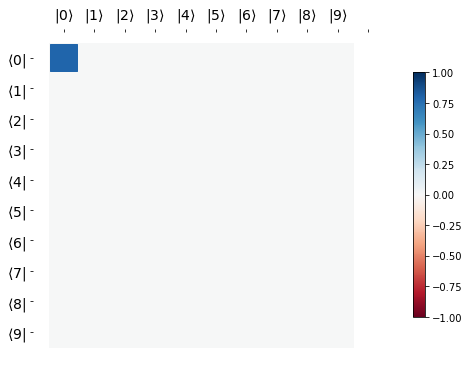

In [3]:
hinton(rho);

Now we have to create some anhiliation operators acting on the system. And (optionally) the system Hamiltonian which will be of the form

$$
\hat{\mathcal{H}}_S = \hbar \omega \hat{a} \hat{a}^\dagger 
$$

In [4]:
a = destroy(N=10)            # Create the anhiliation ops.

epsilon_s = 10
H_s = epsilon_s * a.dag() * a  #Create the system Hamiltonian

#plot_wigner_fock_distribution(syst)
#plot_wigner_fock_distribution(rho)
#H_s.eigenenergies()

#We may create a thermal state
#n = 5 # average number of thermal photons
#bath_osc_n = thermal_dm(10, n)
#b = destroy(N=10)

## The bath states and bath Hamiltonian

Now we will create the initial state for the second harmonic oscillator. This 'bath' system will be taken to be in a coherent state (the bath can be taken to be in a random state also, its commented)

In [5]:
bath_1 = coherent(N=10, alpha=1.0) # Example thermal state with an eigenvalue = 1
rho_bath = bath_1 * bath_1.dag()          # Example random bath state
#plot_wigner_fock_distribution(bath)

sum=0                         #suspicious us might wanna check if the state is normalised 
for i in range(10):           # [spoilers:] it is
    sum += bath_1[i] ** 2
print(sum)

[[1.+0.j]]


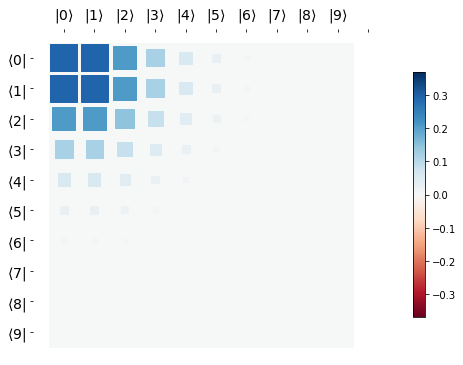

In [6]:
hinton(rho_bath);

Now we will create operators that act only on one of the two systems. Operator ```a_n``` will act on the system and operator ```b_n``` will act only on the 'bath' system. i.e

$$
\hat{a}_n = \hat{a}_s \otimes \mathbb{1}_B \hspace{10mm} \hat{b}_n = \mathbb{1}_s \otimes \hat{a}_B
$$

In [7]:
a_n = tensor(a, qeye(N)) #tensor product that acts only
                         #on system 1 and gives identity on 2
b_n = tensor(qeye(N), a)
gamma = tensor(a.dag(), a) + tensor(a, a.dag()) #interaction operator
epsilon_b = 10            #bath energies are taken to be larger that system energies

In [8]:
total_state = tensor(syst, bath_1) # Create the total state
total_state                       # as a tensor product

Quantum object: dims = [[10, 10], [1, 1]], shape = (100, 1), type = ket
Qobj data =
[[0.60653066]
 [0.60653066]
 [0.42888194]
 [0.24761511]
 [0.12380753]
 [0.0553686 ]
 [0.02260303]
 [0.00854887]
 [0.00299672]
 [0.00110007]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.  

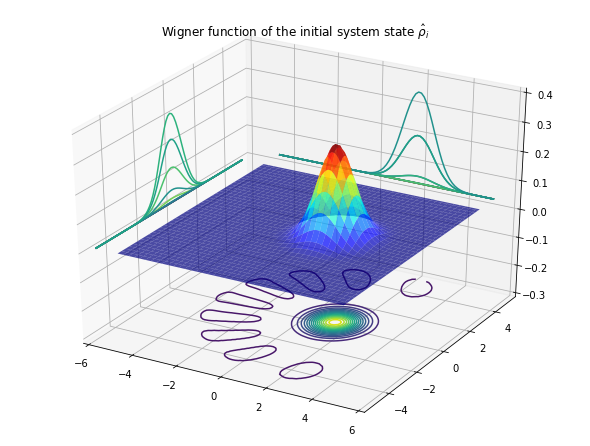

In [9]:
#plot_wigner(total_state) #plot of the initial state
#plot_wigner(fin) #plot of the final state

xvec = np.arange(-40.,40.)*5./40
X,Y = np.meshgrid(xvec, xvec)

W = wigner(total_state, xvec, xvec)

fig1 = plt.figure(figsize=(8,6))
ax = Axes3D(fig1)
ax.plot_surface(X, Y, W, rstride=2, cstride=2, cmap=cm.jet, alpha=0.7)
ax.contour(X, Y, W, 15,zdir='x', offset=-6)
ax.contour(X, Y, W, 15,zdir='y', offset=6)
ax.contour(X, Y, W, 15,zdir='z', offset=-0.3)
ax.set_xlim3d(-6,6)
ax.set_xlim3d(-6,6)
ax.set_zlim3d(-0.3,0.4)
plt.title(r'Wigner function of the initial system state $\hat{\rho}_i$');

## Interaction and time evolution

We will now create the total system Hamiltonian

$$
\hat{H}_{S+B} = \epsilon_s  \hat{a}^\dagger \hat{a} + \epsilon_b  \hat{b}^\dagger \hat{b} + g \hat{\Gamma}
$$

where $\Gamma = \hat{a}^\dagger \otimes \hat{a} + \hat{a} \otimes \hat{a}^\dagger$. In the strong coupling regime where g=1. And run the solver for time $t=1000$ (starting from $t=0$) with a given output every $dt=10$.

In [10]:
g=1   #System-Bath strong coupling
H_tot = epsilon_s * (a_n * a_n.dag()) + epsilon_b * (b_n * b_n.dag()) + g * gamma

In [11]:
tlist = np.linspace(0, 10, int(1e3)) # list of times for which the solver should store the state vector
result = mesolve(H_tot, total_state, tlist, [], [])
#result.states

## Results
We will now plot the final density matrix of the composite system

In [12]:
fin = result.states[-1] #the final state
len(result.states)      #number of intermediate stored states

1000

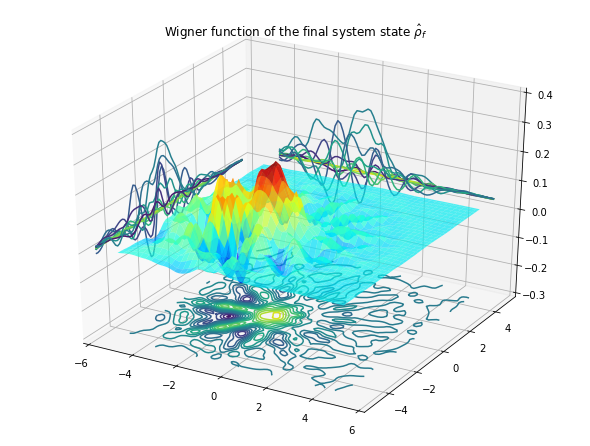

In [13]:
xvec = np.arange(-40.,40.)*5./40
X,Y = np.meshgrid(xvec, xvec)

W = wigner(fin, xvec, xvec)

fig1 = plt.figure(figsize=(8,6))
ax = Axes3D(fig1)
ax.plot_surface(X, Y, W, rstride=2, cstride=2, cmap=cm.jet, alpha=0.7)
ax.contour(X, Y, W, 15,zdir='x', offset=-6)
ax.contour(X, Y, W, 15,zdir='y', offset=6)
ax.contour(X, Y, W, 15,zdir='z', offset=-0.3)
ax.set_xlim3d(-6,6)
ax.set_xlim3d(-6,6)
ax.set_zlim3d(-0.3,0.4)
plt.title(r'Wigner function of the final system state $\hat{\rho}_f$');

We will now perform a partial trace to obtain the reduced density matrix for both systems

In [14]:
dmatrix = fin * fin.dag()
dmatrix_S = dmatrix.ptrace(0) # Reduced density matrix of system
dmatrix_R = dmatrix.ptrace(1) # Reduced density matrix of bath

In [15]:
dmatrix_S

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[ 7.43893309e-01+0.00000000e+00j -2.04891817e-01-3.48910843e-01j
  -7.58111768e-02+1.35912046e-01j  4.88621564e-02-1.08831113e-03j
  -6.98430055e-03-1.13031432e-02j -1.50211175e-03+2.84569679e-03j
   6.92837364e-04-2.91058223e-05j -6.98103078e-05-1.04098065e-04j
  -1.19534422e-05+5.00036470e-06j  3.14698205e-07+1.24756408e-07j]
 [-2.04891817e-01+3.48910843e-01j  2.20085106e-01+0.00000000e+00j
  -4.28665966e-02-7.29926475e-02j -1.29477636e-02+2.32177936e-02j
   7.22526208e-03-1.62626316e-04j -9.20997452e-04-1.48833500e-03j
  -1.77176755e-04+3.32978909e-04j  6.80529463e-05-4.07174733e-06j
   9.46822276e-07-6.98373364e-06j -1.45191661e-07+1.13244217e-07j]
 [-7.58111768e-02-1.35912046e-01j -4.28665966e-02+7.29926475e-02j
   3.25580027e-02+0.00000000e+00j -5.17850649e-03-8.81648150e-03j
  -1.35335759e-03+2.42799786e-03j  6.73003152e-04-1.55681833e-05j
  -7.59247745e-05-1.23615734e-04j -1.19038685e

(<Figure size 576x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fec3b653310>,
       dtype=object))

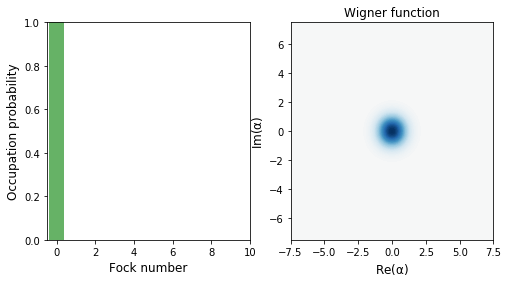

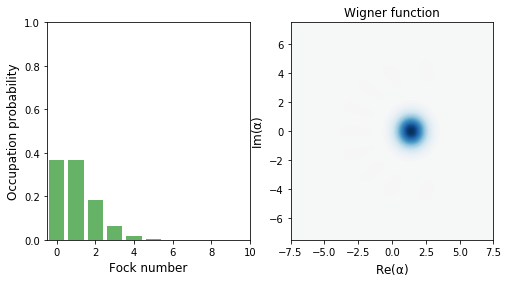

In [16]:
plot_wigner_fock_distribution(syst)
plot_wigner_fock_distribution(bath_1)

(<Figure size 576x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fec416ed210>,
       dtype=object))

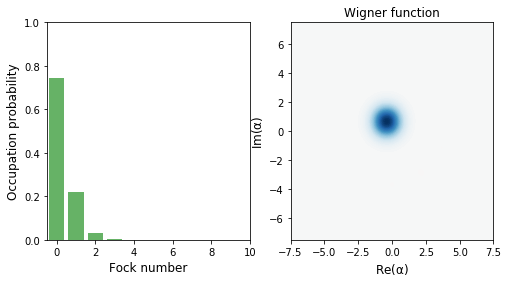

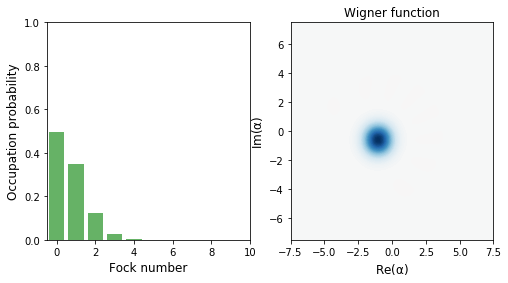

In [17]:
plot_wigner_fock_distribution(dmatrix_S)
plot_wigner_fock_distribution(dmatrix_R)

## Expectation Values

In [18]:
expect(a * a.dag(), syst) -1 #initial expectation value of number of photons 

0.0

In [19]:
expect(a * a.dag(), bath_1) -1

0.9999878243385796

In [20]:
expect(tensor(a * a.dag(), a * a.dag()), result.states[-1]) -1 
#expectation value of number of photons produced by the system and absorbed by the bath and vice versa (sum)

1.2079206009301315

In [21]:
exp_matrix_s = np.zeros((1000,1))
exp_matrix_b = np.zeros((1000,1))                 #initialise a zero matrix for system and bath

for i in range(1000):                             # create 'exp_matrix' which stores expectation values
        
    exp_syst_i = result.states[i]                 # the system state a time i (* timestep)
    exp_dm = exp_syst_i * exp_syst_i.dag()          # density matrix
    exp_rdm_s = exp_dm.ptrace(0)                   # reduced dmatrix for system
    exp_rdm_b = exp_dm.ptrace(1)                   # reduced dmatrix for bath
    exp_matrix_s[i] = expect(a * a.dag(), exp_rdm_s)
    exp_matrix_b[i] = expect(a * a.dag(), exp_rdm_b)
    
    
#my_matrix

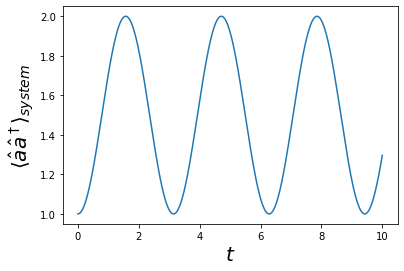

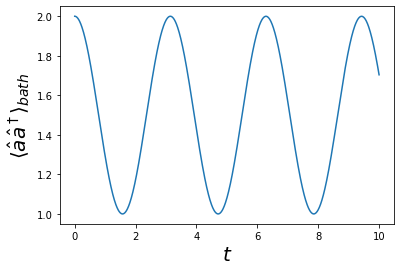

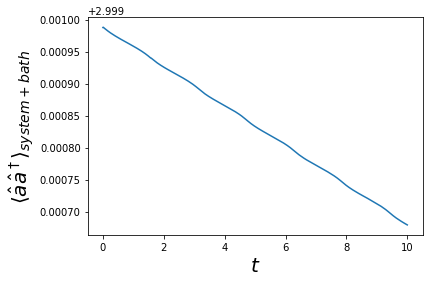

In [22]:
fig, axes = plt.subplots(1,1)  
axes.plot(tlist, exp_matrix_s)
axes.set_xlabel(r'$t$', fontsize=20)
axes.set_ylabel(r'$\left<\hat{a} \hat{a}^\dagger\right>_{system}$', fontsize=20);

fig, axes = plt.subplots(1,1)
axes.plot(tlist, exp_matrix_b)
axes.set_xlabel(r'$t$', fontsize=20)
axes.set_ylabel(r'$\left<\hat{a} \hat{a}^\dagger\right>_{bath}$', fontsize=20);

fig, axes = plt.subplots(1,1)
axes.plot(tlist, exp_matrix_b + exp_matrix_s)
axes.set_xlabel(r'$t$', fontsize=20)
axes.set_ylabel(r'$\left<\hat{a} \hat{a}^\dagger\right>_{system+bath}$', fontsize=20);

# the third plot is should be zero but its not due to calculation and rounding (by the machine) errors

In [23]:
tracedist(result.states[0], result.states[-1]) 
#distance metric for determining how close two density matrix distributions are to each other (initial,final)
#tracedist(result.states[-1], result.states[-1]) = 0

0.9839445590429965

In [24]:
fidelity(result.states[0], result.states[-1]) 
#fidelity(result.states[0], result.states[0]) = 1
#tracedist^2 = 1 - fidelity^2

0.17848537275743834

In [25]:
system_photons = expect(a*a.dag(), dmatrix_S)
bath_photons = expect(a*a.dag(), dmatrix_R)

## A more energetic scenario

Now what would happen if the system instead of starting in the ground state started in a highest excited state `n=5`? Note that we cannot set `n=9` because then due to the truncated HIlbert state of the problem the action of $\hat{a}^\dagger$ would not wield the next excited state.

In [26]:
N=10                
n=5    #we cant set n=9 because due to the truncated Hilbert space time evolution will not take place            
syst2 =  basis(N,n)  
rho2 = fock_dm(N,n)  
syst2

Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]

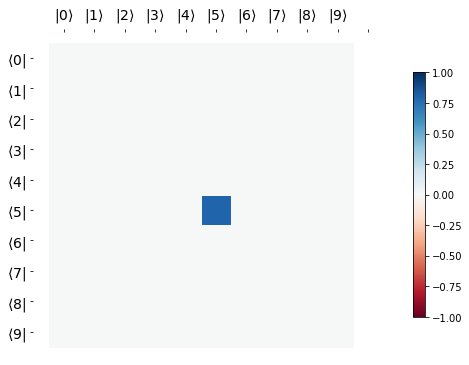

In [27]:
hinton(rho2);

In [28]:
a2 = destroy(N=10)            
epsilon_s2 = 10
bath_2 = coherent(N=10, alpha=1.0) 
rho_bath2 = bath_2 * bath_2.dag()       

a2_n = tensor(a, qeye(N))                      
b2_n = tensor(qeye(N), a)
gamma2 = tensor(a2.dag(), a2) + tensor(a2, a2.dag()) 
epsilon_b2 = 10   

total_state2 = tensor(syst2, bath_2) 
total_state2         

g2=1   
H_tot2 = epsilon_s2 * (a2_n * a2_n.dag()) + epsilon_b2 * (b2_n * b2_n.dag()) + g2 * gamma2

tlist = np.linspace(0, 10, int(1e3)) 
result = mesolve(H_tot, total_state2, tlist, [], [])

fin2 = result.states[-1]
dmatrix = fin2 * fin2.dag()
dmatrix_S2 = dmatrix.ptrace(0) 
dmatrix_R2 = dmatrix.ptrace(1) 
#result.states

Plotting once again the initial states of the two systems

(<Figure size 576x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fec3b4ed350>,
       dtype=object))

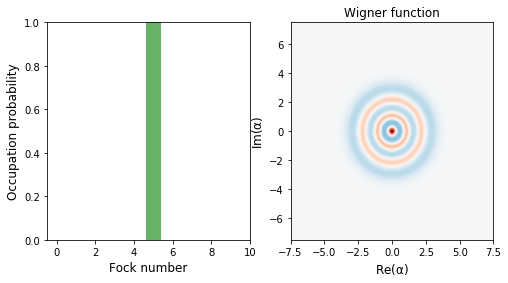

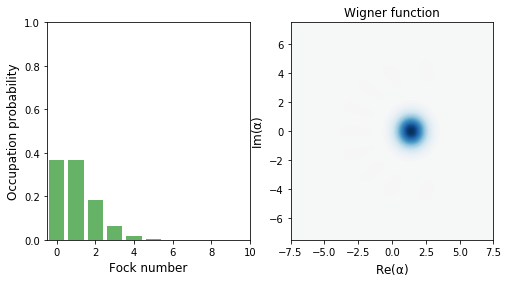

In [29]:
plot_wigner_fock_distribution(rho2)
plot_wigner_fock_distribution(rho_bath2)

And plotting the reduced density matrices of each of the subsystems one sees the dissipation of energy from the first system to the second (the so called bath).

(<Figure size 576x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fec3b05abd0>,
       dtype=object))

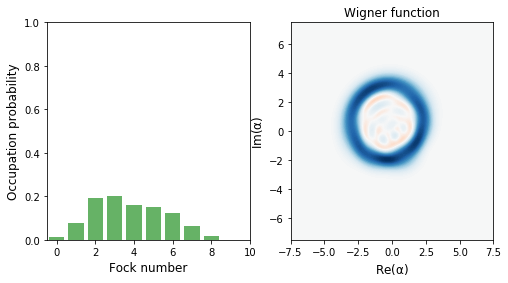

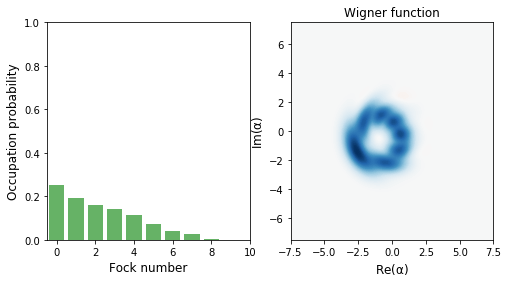

In [30]:
plot_wigner_fock_distribution(dmatrix_S2)
plot_wigner_fock_distribution(dmatrix_R2)

In [31]:
#ev_state = result.states[500]
#hinton(ev_state * ev_state.dag())

This can be seen even better in a 3D Wigner plot

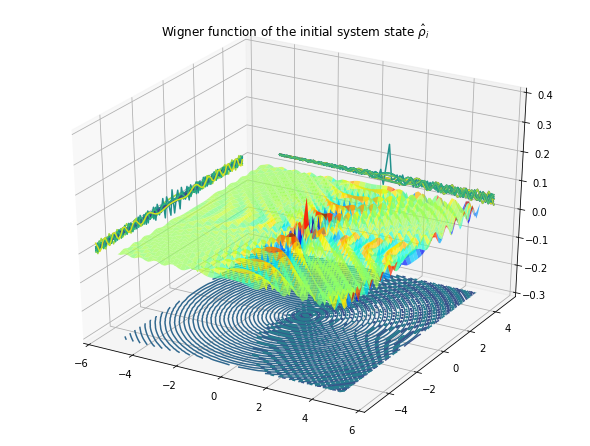

In [32]:
xvec = np.arange(-40.,40.)*5./40
X,Y = np.meshgrid(xvec, xvec)

W = wigner(total_state2, xvec, xvec)

fig1 = plt.figure(figsize=(8,6))
ax = Axes3D(fig1)
ax.plot_surface(X, Y, W, rstride=2, cstride=2, cmap=cm.jet, alpha=0.7)
ax.contour(X, Y, W, 15,zdir='x', offset=-6)
ax.contour(X, Y, W, 15,zdir='y', offset=6)
ax.contour(X, Y, W, 15,zdir='z', offset=-0.3)
ax.set_xlim3d(-6,6)
ax.set_xlim3d(-6,6)
ax.set_zlim3d(-0.3,0.4)
plt.title(r'Wigner function of the initial system state $\hat{\rho}_i$');

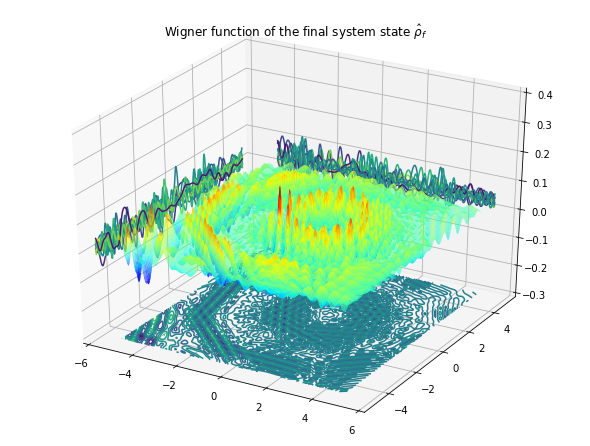

In [38]:
xvec = np.arange(-200.,200.)*5./200
X,Y = np.meshgrid(xvec, xvec)

W = wigner(fin2, xvec, xvec)

fig1 = plt.figure(figsize=(8,6))
ax = Axes3D(fig1)
ax.plot_surface(X, Y, W, rstride=2, cstride=2, cmap=cm.jet, alpha=0.7)
ax.contour(X, Y, W, 15,zdir='x', offset=-6)
ax.contour(X, Y, W, 15,zdir='y', offset=6)
ax.contour(X, Y, W, 15,zdir='z', offset=-0.3)
ax.set_xlim3d(-6,6)
ax.set_xlim3d(-6,6)
ax.set_zlim3d(-0.3,0.4)
plt.title(r'Wigner function of the final system state $\hat{\rho}_f$');

While the initial state has some degree of coherence the final state admits a chaotic distribution 

## Conclusion

Our aim here was to present an elementary interaction between two simple harmonic oscillators. We have here modelled the interaction between two $N=10$ dimentional harmonic oscillators.We saw that in the first case where the first oscillator is in the state $|0\rangle$ and the second oscillator in a coherent superposition, during the time evolution some degree of coherence remains. 

However this degree of coherence rapidly decays when the energy of one of the subsystems is large. This can happen either by starting one of the systems in an excited state (here being the state $|9\rangle$) or by introducing a higher angular frequency (higher energy / higher epsilon) in one of the harmonic oscillators. The former was shown.

From here on one should extend this model if it is do describe an open quantum system by introducing more oscillators. This can happen for example if the bath state (a $1 \times 10$ matrix) is constituted by a $N \times M$ matrix where $N$ be the dimentions of the oscillator and $M$ be the number of such oscillators.

$%From then on each of these oscillators (the sum of which can rightly so be called a 'bath') will be described by a portion of the matrix describing the whole bath. i.e if `bath[N,M]` is the matrix describing the bath then `bath[n,:]` will describe the n-th oscillator of the bath. Fast caclulation of such systems can be obtained even in python by using `numpy` arrays.$



In [34]:
from qutip.ipynbtools import version_table
version_table()

Software,Version
QuTiP,4.5.0
Numpy,1.18.1
SciPy,1.4.1
matplotlib,3.1.3
Cython,0.29.17
Number of CPUs,2
BLAS Info,OPENBLAS
IPython,7.12.0
Python,"3.7.5 (default, Apr 19 2020, 20:18:17) [GCC 9.2.1 20191008]"
OS,posix [linux]
